# Hongkong Individual

## Pie Chart

AgeGroup
Elderly              1984
Older Middle-Aged    1839
Young Middle-Aged    1632
Youth                 423
Name: count, dtype: int64


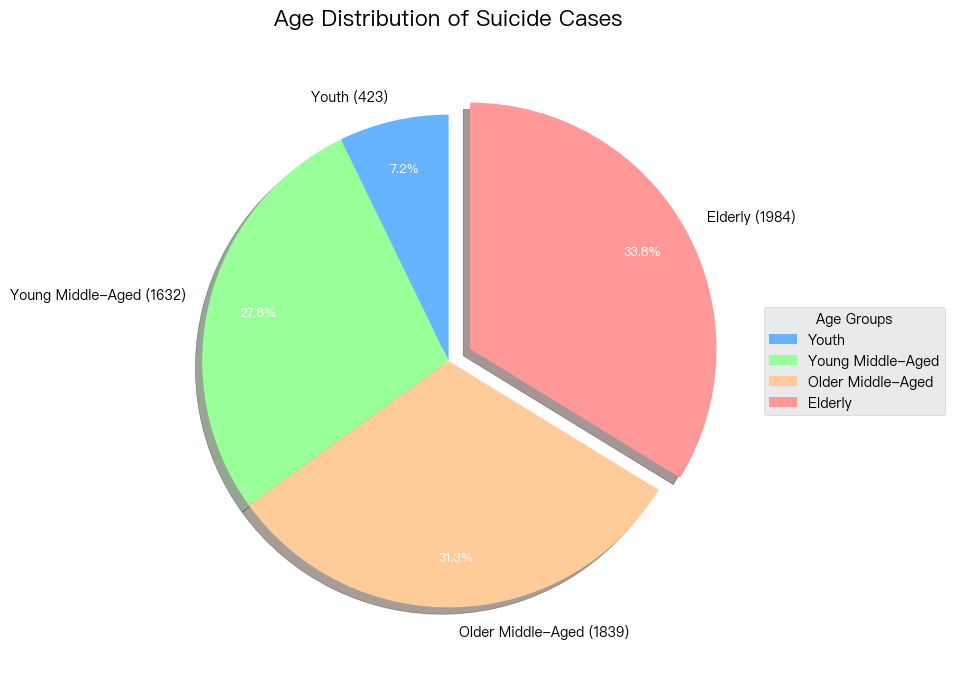

In [8]:
import pandas as pd

# 读取数据并确保Age为数值类型
df = pd.read_csv('../dataset/suicide.csv')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # 将非数值转为NaN
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 120], labels=['Youth', 'Young Middle-Aged', 'Older Middle-Aged', 'Elderly'])
print(df['AgeGroup'].value_counts())


import matplotlib.pyplot as plt

# 统计各年龄组数量
grouped_counts = df['AgeGroup'].value_counts().sort_index()

# 设置绘图参数
plt.figure(figsize=(10, 8))
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']  # 柔和的蓝、绿、橙、红
explode = (0, 0, 0, 0.1)  # 突出"Elderly"组
labels = [f'{label} ({count})' for label, count in zip(grouped_counts.index, grouped_counts.values)]

# 绘制饼图
wedges, texts, autotexts = plt.pie(
    grouped_counts,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 10},
    pctdistance=0.8,
    labeldistance=1.1
)

# 美化标签
plt.setp(autotexts, size=9, weight="bold", color='white')  # 百分比文字加粗白字
plt.setp(texts, size=10)

# 添加标题和图例
plt.title('Age Distribution of Suicide Cases', fontsize=16, pad=20)
plt.legend(
    wedges,
    grouped_counts.index,
    title="Age Groups",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# 保存高清图
plt.show()


## HeatMap

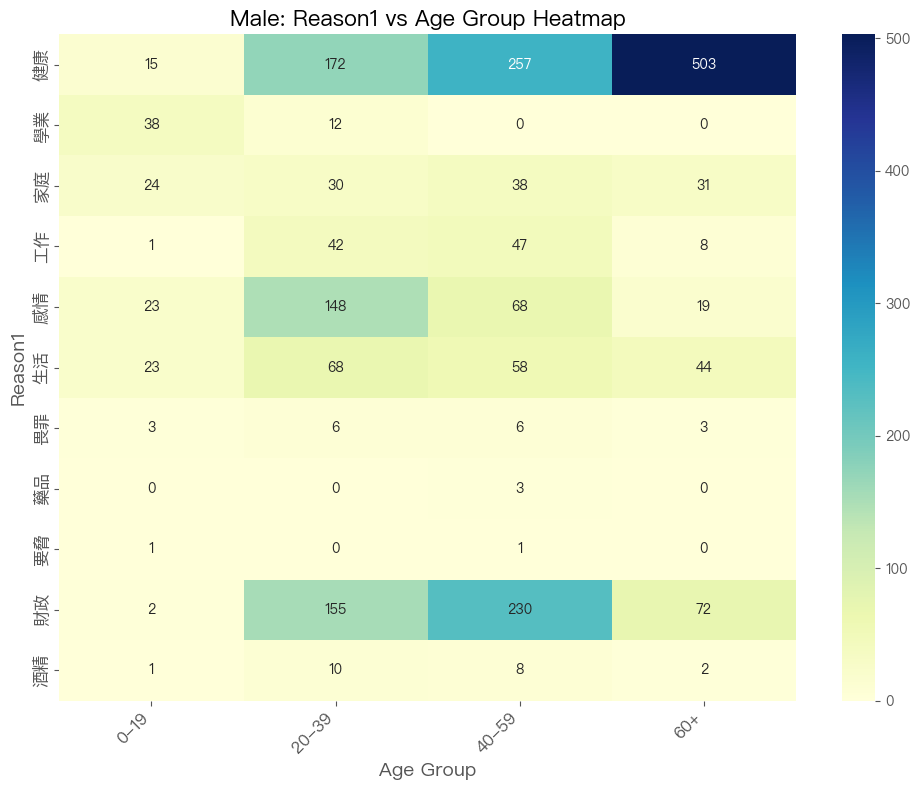

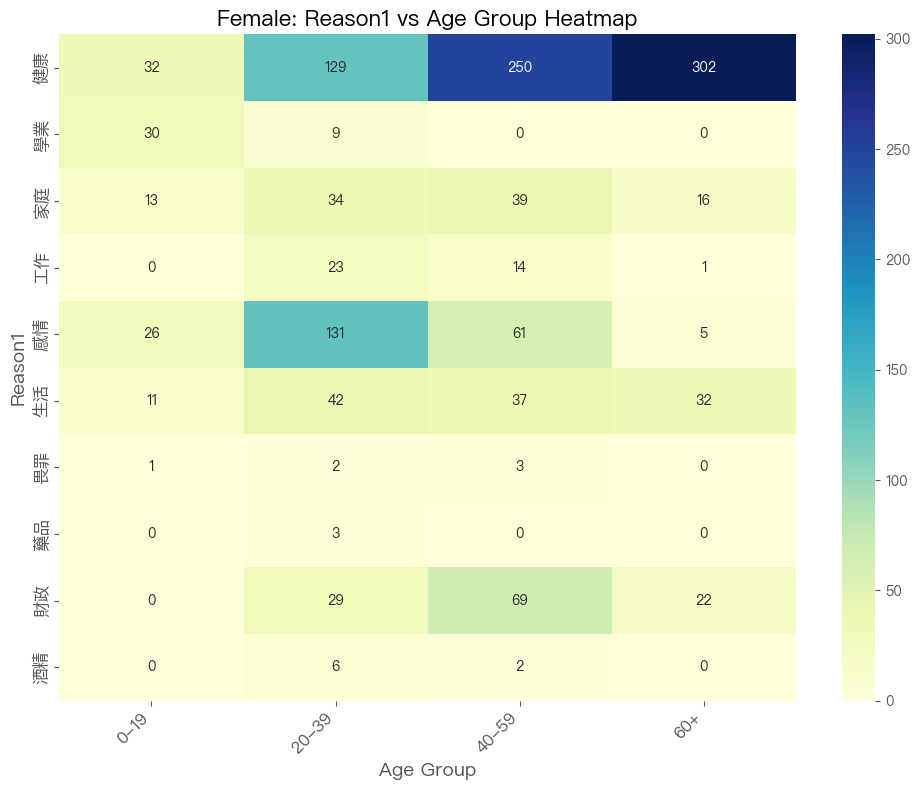

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.manifold import TSNE

plt.rcParams['font.sans-serif'] = ['PingFang HK']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

# === Step 1: data preprocess ===
data = pd.read_csv("../dataset/suicide.csv")
features = ["Age", "Gender", "reason1"]
df = data[features].copy()
df = df[df['reason1'] != '不詳']
df = df[df['Age'] != '不詳']
# remove columns with abnormal age
df = df[pd.to_numeric(df['Age'], errors='coerce').notnull()]
# convert age to numeric
df['Age'] = pd.to_numeric(df['Age'])

# split age
def age_binning(age):
    if age < 20:
        return '0-19'
    elif age < 40:
        return '20-39'
    elif age < 60:
        return '40-59'
    else:
        return '60+'

df['Age_Group'] = df['Age'].apply(age_binning)

# split into female and male
df_male = df[df['Gender'] == '男'].copy()
df_female = df[df['Gender'] == '女'].copy()

# label encode
def label_encode_data(df):
    label_encoders = {}
    categorical_columns = ['Gender', 'reason1']
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    return df, label_encoders

df_male, label_encoders_male = label_encode_data(df_male)
df_female, label_encoders_female = label_encode_data(df_female)

# determine feature attribute
categorical_indices_male = [df_male.columns.get_loc(col) for col in ['Gender', 'reason1']]
categorical_indices_female = [df_female.columns.get_loc(col) for col in ['Gender', 'reason1']]
# === Step 5: generate heatmap ===

# male
male_crosstab = pd.crosstab(df_male['reason1'], df_male['Age_Group'])
male_crosstab.index = label_encoders_male['reason1'].inverse_transform(male_crosstab.index)
plt.figure(figsize=(10, 8))
sns.heatmap(male_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Male: Reason1 vs Age Group Heatmap', fontsize=16)  # 增大标题字体大小
plt.xlabel('Age Group', fontsize=14)  # 增大 x 轴标签字体大小
plt.xticks(rotation=45, ha='right', fontsize=12)  # 旋转 x 轴标签并调整对齐方式和字体大小
plt.ylabel('Reason1', fontsize=14)  # 增大 y 轴标签字体大小
plt.yticks(fontsize=12)  # 增大 y 轴刻度字体大小
plt.tight_layout()  # 自动调整布局，避免文字被裁剪
plt.show()

# female
female_crosstab = pd.crosstab(df_female['reason1'], df_female['Age_Group'])
female_crosstab.index = label_encoders_female['reason1'].inverse_transform(female_crosstab.index)
plt.figure(figsize=(10, 8))
sns.heatmap(female_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Female: Reason1 vs Age Group Heatmap', fontsize=16)  # 增大标题字体大小
plt.xlabel('Age Group', fontsize=14)  # 增大 x 轴标签字体大小
plt.xticks(rotation=45, ha='right', fontsize=12)  # 旋转 x 轴标签并调整对齐方式和字体大小
plt.ylabel('Reason1', fontsize=14)  # 增大 y 轴标签字体大小
plt.yticks(fontsize=12)  # 增大 y 轴刻度字体大小
plt.tight_layout()  # 自动调整布局，避免文字被裁剪
plt.show()
    

## Cluster

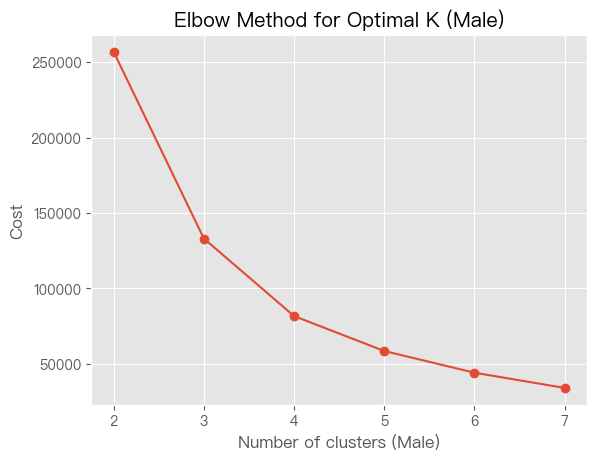

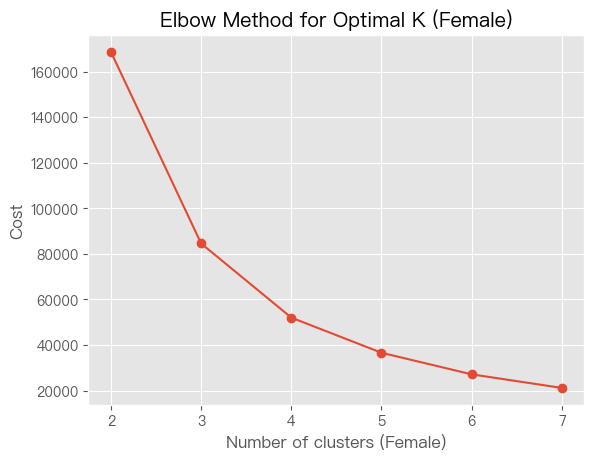

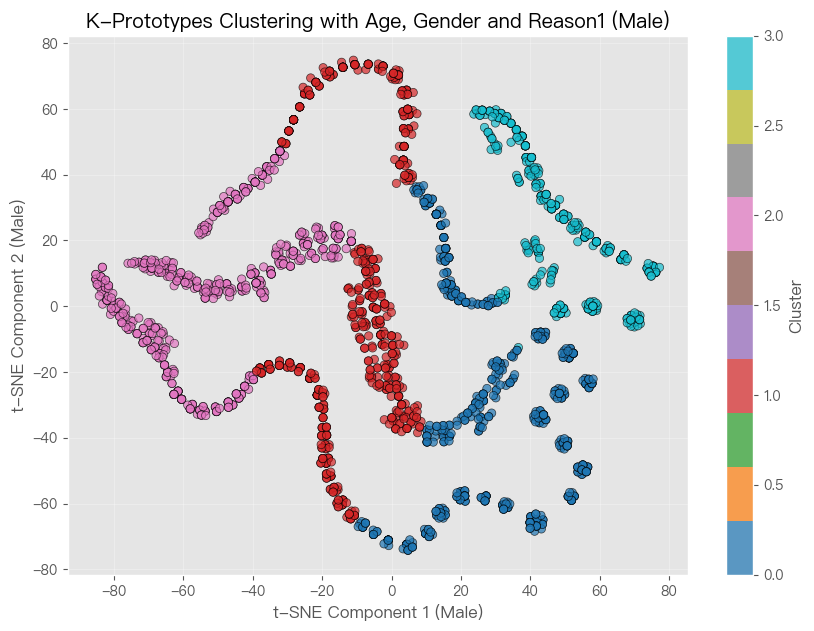

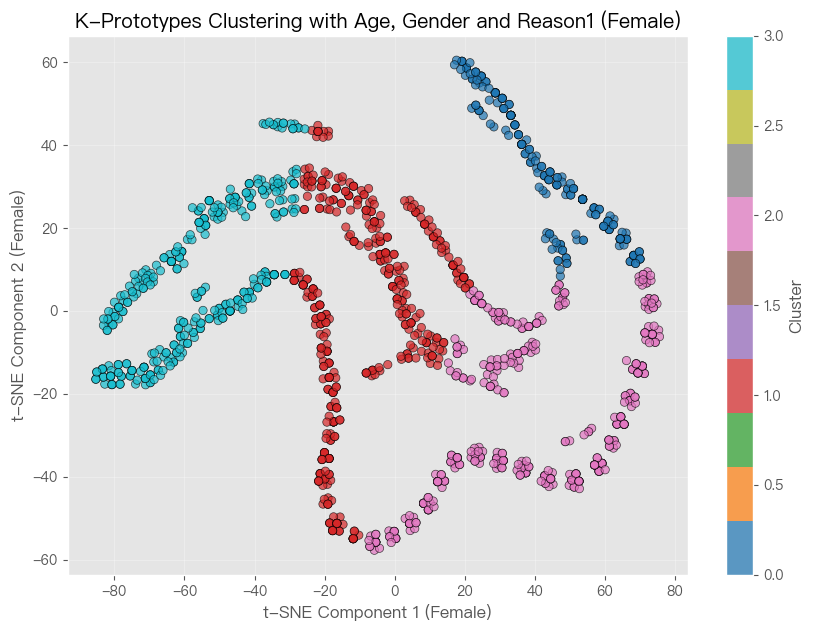


男性各聚类中心特征与样本数：
               Age Gender reason1  Count
Cluster                                 
0        60.283019      男      健康    583
1        42.817204      男      財政    651
2        24.678201      男      健康    578
3        78.669444      男      健康    360

女性各聚类中心特征与样本数：
               Age Gender reason1  Count
Cluster                                 
0        78.346154      女      健康    208
1        40.700935      女      健康    428
2        58.481013      女      健康    395
3        22.489796      女      感情    343


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.manifold import TSNE

# === Step 1: data preprocess ===
data = pd.read_csv("../dataset/suicide.csv")
features = ["Age", "Gender", "reason1"]
df = data[features].copy()
df = df[df['reason1'] != '不詳']
df = df[df['Age'] != '不詳']
# remove 
df = df[pd.to_numeric(df['Age'], errors='coerce').notnull()]
# convert
df['Age'] = pd.to_numeric(df['Age'])

df_male = df[df['Gender'] == '男'].copy()
df_female = df[df['Gender'] == '女'].copy()

# label
def label_encode_data(df):
    label_encoders = {}
    categorical_columns = ['Gender', 'reason1']
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    return df, label_encoders

df_male, label_encoders_male = label_encode_data(df_male)
df_female, label_encoders_female = label_encode_data(df_female)

categorical_indices_male = [df_male.columns.get_loc(col) for col in ['Gender', 'reason1']]
categorical_indices_female = [df_female.columns.get_loc(col) for col in ['Gender', 'reason1']]

# === Step 2: elbow method ===
costs_male = []
for k in range(2, 8):
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(df_male.values, categorical=categorical_indices_male)
    costs_male.append(kproto.cost_)

plt.plot(range(2, 8), costs_male, marker='o')
plt.xlabel('Number of clusters (Male)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K (Male)')
plt.show()

# elbow method ===
costs_female = []
for k in range(2, 8):
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(df_female.values, categorical=categorical_indices_female)
    costs_female.append(kproto.cost_)

plt.plot(range(2, 8), costs_female, marker='o')
plt.xlabel('Number of clusters (Female)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K (Female)')
plt.show()

# choose optimal k
best_k_male = 4
best_k_female = 4

kproto_male = KPrototypes(n_clusters=best_k_male, init='Huang', random_state=42)
df_male['Cluster'] = kproto_male.fit_predict(df_male.values, categorical=categorical_indices_male)

kproto_female = KPrototypes(n_clusters=best_k_female, init='Huang', random_state=42)
df_female['Cluster'] = kproto_female.fit_predict(df_female.values, categorical=categorical_indices_female)

# === Step 3: visualize ===
# t-SNE 
tsne_male = TSNE(n_components=2, random_state=42)
tsne_result_male = tsne_male.fit_transform(df_male.drop('Cluster', axis=1))

plt.figure(figsize=(10, 7))
scatter_male = plt.scatter(tsne_result_male[:, 0], tsne_result_male[:, 1],
                           c=df_male['Cluster'],
                           cmap='tab10',
                           alpha=0.7,
                           edgecolor='k')
plt.title('K-Prototypes Clustering with Age, Gender and Reason1 (Male)')
plt.xlabel('t-SNE Component 1 (Male)')
plt.ylabel('t-SNE Component 2 (Male)')
plt.colorbar(scatter_male, label='Cluster')
plt.grid(alpha=0.3)
plt.show()

# t-SNE
tsne_female = TSNE(n_components=2, random_state=42)
tsne_result_female = tsne_female.fit_transform(df_female.drop('Cluster', axis=1))

plt.figure(figsize=(10, 7))
scatter_female = plt.scatter(tsne_result_female[:, 0], tsne_result_female[:, 1],
                             c=df_female['Cluster'],
                             cmap='tab10',
                             alpha=0.7,
                             edgecolor='k')
plt.title('K-Prototypes Clustering with Age, Gender and Reason1 (Female)')
plt.xlabel('t-SNE Component 1 (Female)')
plt.ylabel('t-SNE Component 2 (Female)')
plt.colorbar(scatter_female, label='Cluster')
plt.grid(alpha=0.3)
plt.show()

# === Step 4: explain ===
# male
cluster_profiles_male = df_male.groupby('Cluster').agg({
    'Age': 'mean',
    'Gender': lambda x: label_encoders_male['Gender'].inverse_transform(x.mode())[0],
    'reason1': lambda x: label_encoders_male['reason1'].inverse_transform(x.mode())[0]
})

# female
cluster_profiles_female = df_female.groupby('Cluster').agg({
    'Age': 'mean',
    'Gender': lambda x: label_encoders_female['Gender'].inverse_transform(x.mode())[0],
    'reason1': lambda x: label_encoders_female['reason1'].inverse_transform(x.mode())[0]
})


cluster_profiles_male['Count'] = df_male.groupby('Cluster').size()

cluster_profiles_female['Count'] = df_female.groupby('Cluster').size()

print("\n男性各聚类中心特征与样本数：")
print(cluster_profiles_male)

print("\n女性各聚类中心特征与样本数：")
print(cluster_profiles_female)

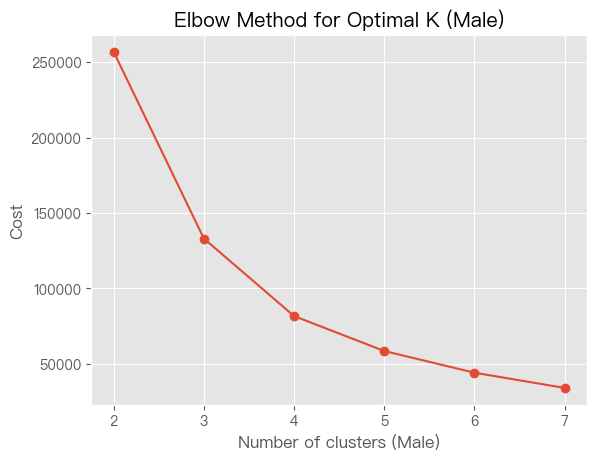

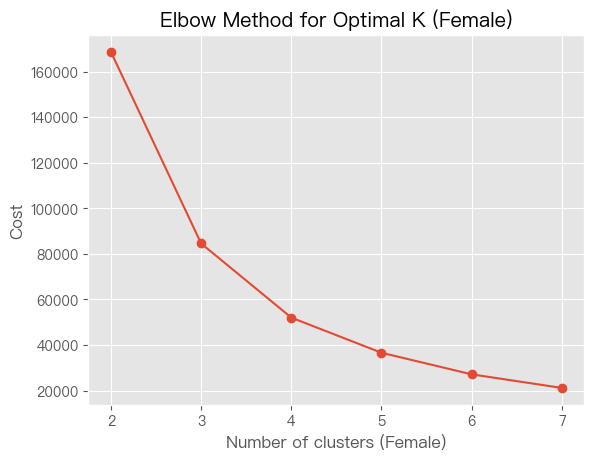

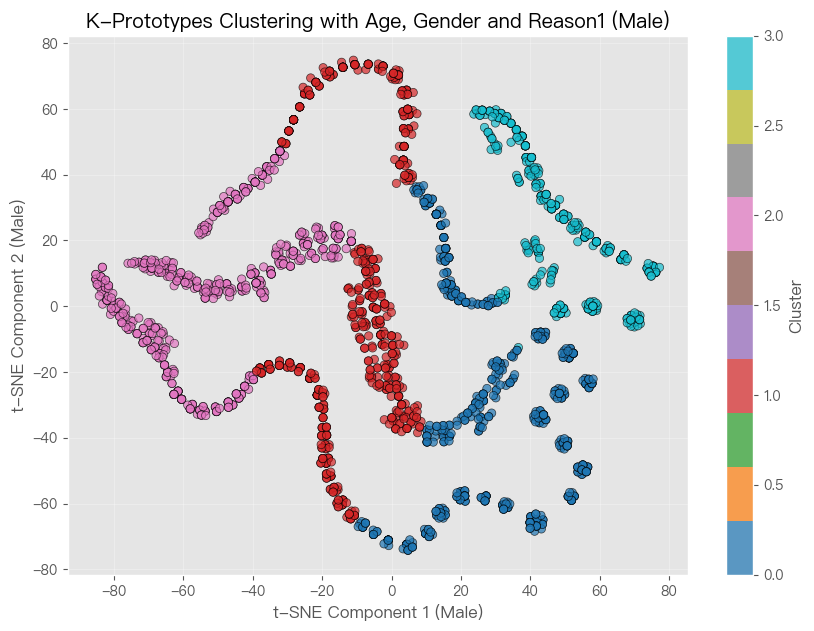

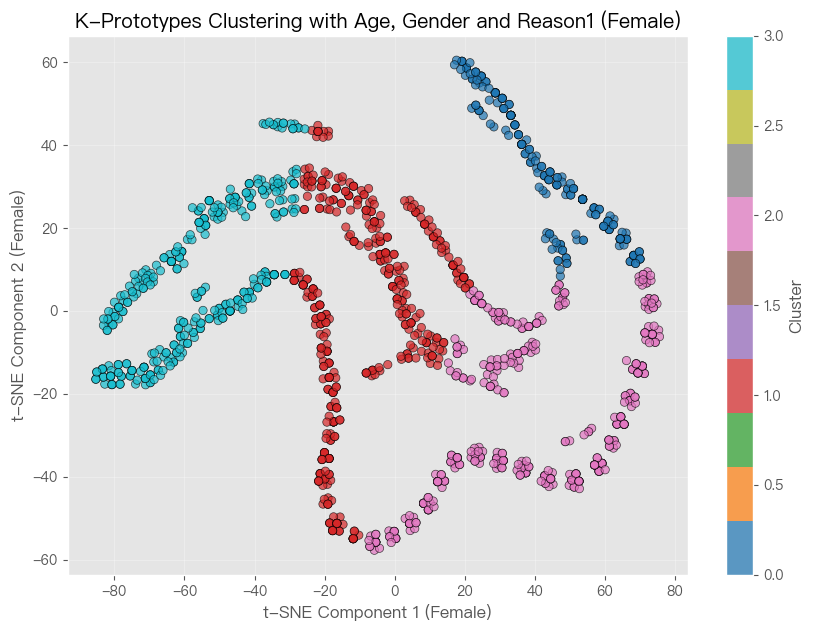


男性各聚类中心特征与样本数：
               Age Gender reason1  Count
Cluster                                 
0        60.283019      男      健康    583
1        42.817204      男      財政    651
2        24.678201      男      健康    578
3        78.669444      男      健康    360

女性各聚类中心特征与样本数：
               Age Gender reason1  Count
Cluster                                 
0        78.346154      女      健康    208
1        40.700935      女      健康    428
2        58.481013      女      健康    395
3        22.489796      女      感情    343

男性数据的轮廓系数: 0.5718

女性数据的轮廓系数: 0.5738


In [67]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE


# 计算两个样本之间的距离（考虑数值型和分类型特征）
def calculate_distance(sample1, sample2, categorical_indices):
    distance = 0
    for i, (val1, val2) in enumerate(zip(sample1, sample2)):
        if i in categorical_indices:
            if val1 != val2:
                distance += 1
        else:
            distance += abs(val1 - val2)
    return distance


# 计算单个样本的轮廓系数
def silhouette_sample(sample, cluster_data, cluster_labels, categorical_indices, current_cluster):
    a = 0
    b = float('inf')
    cluster_members = np.where(cluster_labels == current_cluster)[0]
    other_clusters = np.unique(cluster_labels)[np.where(np.unique(cluster_labels) != current_cluster)[0]]

    # 计算 a：样本到同一聚类中其他样本的平均距离
    for member in cluster_members:
        if member != np.where(cluster_data == sample)[0][0]:
            a += calculate_distance(sample, cluster_data[member], categorical_indices)
    a = a / (len(cluster_members) - 1) if len(cluster_members) > 1 else 0

    # 计算 b：样本到其他聚类中样本的最小平均距离
    for other_cluster in other_clusters:
        other_cluster_members = np.where(cluster_labels == other_cluster)[0]
        other_cluster_distance = 0
        for other_member in other_cluster_members:
            other_cluster_distance += calculate_distance(sample, cluster_data[other_member], categorical_indices)
        other_cluster_distance = other_cluster_distance / len(other_cluster_members) if len(other_cluster_members) > 0 else float('inf')
        b = min(b, other_cluster_distance)

    return (b - a) / max(a, b) if max(a, b) > 0 else 0


# 计算聚类结果的轮廓系数
def silhouette_score_custom(cluster_data, cluster_labels, categorical_indices):
    silhouette_scores = []
    for i, sample in enumerate(cluster_data):
        current_cluster = cluster_labels[i]
        silhouette_scores.append(silhouette_sample(sample, cluster_data, cluster_labels, categorical_indices,
                                                   current_cluster))
    return np.mean(silhouette_scores)


# === Step 1: data preprocess ===
data = pd.read_csv("../dataset/suicide.csv")
features = ["Age", "Gender", "reason1"]
df = data[features].copy()
df = df[df['reason1'] != '不詳']
df = df[df['Age'] != '不詳']
# remove 
df = df[pd.to_numeric(df['Age'], errors='coerce').notnull()]
# convert
df['Age'] = pd.to_numeric(df['Age'])

df_male = df[df['Gender'] == '男'].copy()
df_female = df[df['Gender'] == '女'].copy()

# label
def label_encode_data(df):
    label_encoders = {}
    categorical_columns = ['Gender', 'reason1']
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    return df, label_encoders

df_male, label_encoders_male = label_encode_data(df_male)
df_female, label_encoders_female = label_encode_data(df_female)

categorical_indices_male = [df_male.columns.get_loc(col) for col in ['Gender', 'reason1']]
categorical_indices_female = [df_female.columns.get_loc(col) for col in ['Gender', 'reason1']]

# === Step 2: elbow method ===
costs_male = []
for k in range(2, 8):
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(df_male.values, categorical=categorical_indices_male)
    costs_male.append(kproto.cost_)

plt.plot(range(2, 8), costs_male, marker='o')
plt.xlabel('Number of clusters (Male)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K (Male)')
plt.show()

# elbow method ===
costs_female = []
for k in range(2, 8):
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(df_female.values, categorical=categorical_indices_female)
    costs_female.append(kproto.cost_)

plt.plot(range(2, 8), costs_female, marker='o')
plt.xlabel('Number of clusters (Female)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K (Female)')
plt.show()

# choose optimal k
best_k_male = 4
best_k_female = 4

kproto_male = KPrototypes(n_clusters=best_k_male, init='Huang', random_state=42)
df_male['Cluster'] = kproto_male.fit_predict(df_male.values, categorical=categorical_indices_male)

kproto_female = KPrototypes(n_clusters=best_k_female, init='Huang', random_state=42)
df_female['Cluster'] = kproto_female.fit_predict(df_female.values, categorical=categorical_indices_female)

# === Step 3: visualize ===
# t-SNE 
tsne_male = TSNE(n_components=2, random_state=42)
tsne_result_male = tsne_male.fit_transform(df_male.drop('Cluster', axis=1))

plt.figure(figsize=(10, 7))
scatter_male = plt.scatter(tsne_result_male[:, 0], tsne_result_male[:, 1],
                           c=df_male['Cluster'],
                           cmap='tab10',
                           alpha=0.7,
                           edgecolor='k')
plt.title('K-Prototypes Clustering with Age, Gender and Reason1 (Male)')
plt.xlabel('t-SNE Component 1 (Male)')
plt.ylabel('t-SNE Component 2 (Male)')
plt.colorbar(scatter_male, label='Cluster')
plt.grid(alpha=0.3)
plt.show()

# t-SNE
tsne_female = TSNE(n_components=2, random_state=42)
tsne_result_female = tsne_female.fit_transform(df_female.drop('Cluster', axis=1))

plt.figure(figsize=(10, 7))
scatter_female = plt.scatter(tsne_result_female[:, 0], tsne_result_female[:, 1],
                             c=df_female['Cluster'],
                             cmap='tab10',
                             alpha=0.7,
                             edgecolor='k')
plt.title('K-Prototypes Clustering with Age, Gender and Reason1 (Female)')
plt.xlabel('t-SNE Component 1 (Female)')
plt.ylabel('t-SNE Component 2 (Female)')
plt.colorbar(scatter_female, label='Cluster')
plt.grid(alpha=0.3)
plt.show()

# === Step 4: explain ===
# male
cluster_profiles_male = df_male.groupby('Cluster').agg({
    'Age': 'mean',
    'Gender': lambda x: label_encoders_male['Gender'].inverse_transform(x.mode())[0],
    'reason1': lambda x: label_encoders_male['reason1'].inverse_transform(x.mode())[0]
})

# female
cluster_profiles_female = df_female.groupby('Cluster').agg({
    'Age': 'mean',
    'Gender': lambda x: label_encoders_female['Gender'].inverse_transform(x.mode())[0],
    'reason1': lambda x: label_encoders_female['reason1'].inverse_transform(x.mode())[0]
})


cluster_profiles_male['Count'] = df_male.groupby('Cluster').size()

cluster_profiles_female['Count'] = df_female.groupby('Cluster').size()

print("\n男性各聚类中心特征与样本数：")
print(cluster_profiles_male)

print("\n女性各聚类中心特征与样本数：")
print(cluster_profiles_female)

# 计算男性数据的轮廓系数
male_silhouette = silhouette_score_custom(df_male.values, df_male['Cluster'].values, categorical_indices_male)
print(f"\n男性数据的轮廓系数: {male_silhouette:.4f}")

# 计算女性数据的轮廓系数
female_silhouette = silhouette_score_custom(df_female.values, df_female['Cluster'].values, categorical_indices_female)
print(f"\n女性数据的轮廓系数: {female_silhouette:.4f}")

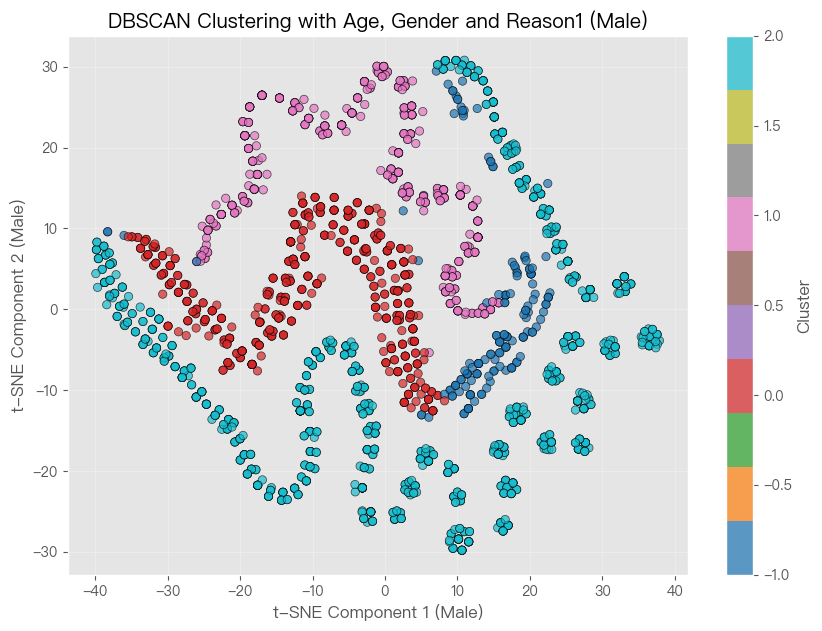

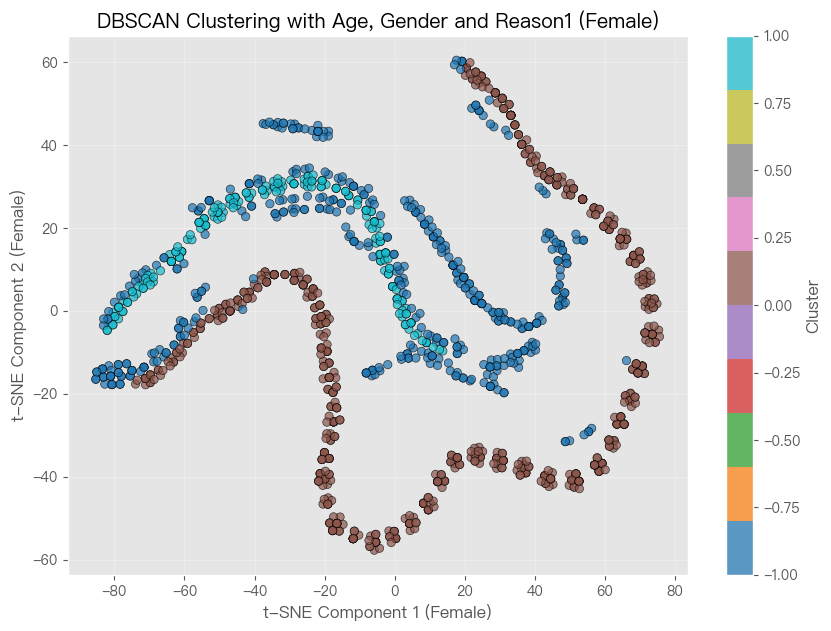


男性各聚类中心特征与样本数：
               Age Gender reason1  Count
Cluster                                 
-1       67.535484      男      生活    155
 0       34.689266      男      感情    531
 1       44.325431      男      財政    464
 2       54.940313      男      健康   1022

女性各聚类中心特征与样本数：
               Age Gender reason1  Count
Cluster                                 
-1       42.678801      女      生活    467
 0       54.521368      女      健康    702
 1       30.853659      女      感情    205

男性数据的轮廓系数: 0.3187

女性数据的轮廓系数: 0.2548


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# === Step 1: data preprocess ===
data = pd.read_csv("../dataset/suicide.csv")
features = ["Age", "Gender", "reason1"]
df = data[features].copy()
df = df[df['reason1'] != '不詳']
df = df[df['Age'] != '不詳']
# remove 
df = df[pd.to_numeric(df['Age'], errors='coerce').notnull()]
# convert
df['Age'] = pd.to_numeric(df['Age'])

df_male = df[df['Gender'] == '男'].copy()
df_female = df[df['Gender'] == '女'].copy()

# label
def label_encode_data(df):
    label_encoders = {}
    categorical_columns = ['Gender', 'reason1']
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    return df, label_encoders

df_male, label_encoders_male = label_encode_data(df_male)
df_female, label_encoders_female = label_encode_data(df_female)

# 对数据进行标准化，因为 DBSCAN 对距离敏感
scaler_male = StandardScaler()
df_male_scaled = scaler_male.fit_transform(df_male)

scaler_female = StandardScaler()
df_female_scaled = scaler_female.fit_transform(df_female)

# === Step 2: DBSCAN clustering ===
# 对于男性数据
# 这里需要根据实际情况调整 eps 和 min_samples 参数
eps_male = 0.3
min_samples_male = 50
dbscan_male = DBSCAN(eps=eps_male, min_samples=min_samples_male)
df_male['Cluster'] = dbscan_male.fit_predict(df_male_scaled)

# 对于女性数据
# 这里需要根据实际情况调整 eps 和 min_samples 参数
eps_female = 0.3
min_samples_female = 50
dbscan_female = DBSCAN(eps=eps_female, min_samples=min_samples_female)
df_female['Cluster'] = dbscan_female.fit_predict(df_female_scaled)

# === Step 3: visualize ===
# t-SNE 
tsne_male = TSNE(n_components=3, random_state=42)
tsne_result_male = tsne_male.fit_transform(df_male.drop('Cluster', axis=1))

plt.figure(figsize=(10, 7))
scatter_male = plt.scatter(tsne_result_male[:, 0], tsne_result_male[:, 1],
                           c=df_male['Cluster'],
                           cmap='tab10',
                           alpha=0.7,
                           edgecolor='k')
plt.title('DBSCAN Clustering with Age, Gender and Reason1 (Male)')
plt.xlabel('t-SNE Component 1 (Male)')
plt.ylabel('t-SNE Component 2 (Male)')
plt.colorbar(scatter_male, label='Cluster')
plt.grid(alpha=0.3)
plt.show()

# t-SNE
tsne_female = TSNE(n_components=2, random_state=42)
tsne_result_female = tsne_female.fit_transform(df_female.drop('Cluster', axis=1))

plt.figure(figsize=(10, 7))
scatter_female = plt.scatter(tsne_result_female[:, 0], tsne_result_female[:, 1],
                             c=df_female['Cluster'],
                             cmap='tab10',
                             alpha=0.7,
                             edgecolor='k')
plt.title('DBSCAN Clustering with Age, Gender and Reason1 (Female)')
plt.xlabel('t-SNE Component 1 (Female)')
plt.ylabel('t-SNE Component 2 (Female)')
plt.colorbar(scatter_female, label='Cluster')
plt.grid(alpha=0.3)
plt.show()

# === Step 4: explain ===
# male
cluster_profiles_male = df_male.groupby('Cluster').agg({
    'Age': 'mean',
    'Gender': lambda x: label_encoders_male['Gender'].inverse_transform(x.mode())[0],
    'reason1': lambda x: label_encoders_male['reason1'].inverse_transform(x.mode())[0]
})

# female
cluster_profiles_female = df_female.groupby('Cluster').agg({
    'Age': 'mean',
    'Gender': lambda x: label_encoders_female['Gender'].inverse_transform(x.mode())[0],
    'reason1': lambda x: label_encoders_female['reason1'].inverse_transform(x.mode())[0]
})


cluster_profiles_male['Count'] = df_male.groupby('Cluster').size()

cluster_profiles_female['Count'] = df_female.groupby('Cluster').size()

print("\n男性各聚类中心特征与样本数：")
print(cluster_profiles_male)

print("\n女性各聚类中心特征与样本数：")
print(cluster_profiles_female)

# 计算轮廓系数
# 男性数据的轮廓系数
if len(set(df_male['Cluster'])) > 1:  # 轮廓系数计算要求聚类数大于 1
    male_silhouette_score = silhouette_score(df_male_scaled, df_male['Cluster'])
    print(f"\n男性数据的轮廓系数: {male_silhouette_score:.4f}")
else:
    print("\n男性数据的聚类数为 1，无法计算轮廓系数。")

# 女性数据的轮廓系数
if len(set(df_female['Cluster'])) > 1:  # 轮廓系数计算要求聚类数大于 1
    female_silhouette_score = silhouette_score(df_female_scaled, df_female['Cluster'])
    print(f"\n女性数据的轮廓系数: {female_silhouette_score:.4f}")
else:
    print("\n女性数据的聚类数为 1，无法计算轮廓系数。")
    

## Association Rules

In [75]:

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# === 数据预处理优化 ===
# 读取数据并筛选列
# caseID,newsDate,newsTime,newsHelp,newsURL,caseDate,caseTime,Area,District,subDistrict,Unit,subUnit,Latitude,Longitude,House,firstName,Gender,Age,Hospitalized,State,suicideNote,mental_illness,emotional_illness,missingRecord,reason1,reason2,reason3,type1,type2,type3

df = pd.read_csv('../dataset/suicide.csv')
selected_columns = ['Gender', 'Age', 'reason1','State','type1','suicideNote','mental_illness','emotional_illness']
df = df[df['reason1'] != '不詳']
data = df[selected_columns].copy()

# === 增强型年龄处理 ===
# 转换年龄为数值类型（处理非法值）
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# 创建带缺失值标记的年龄分段
age_bins = [0, 20, 40, 60, 120]
age_labels = ['0-20', '21-40', '41-60', '61+']
data['Age_Group'] = pd.cut(
    data['Age'],
    bins=age_bins,
    labels=age_labels,
    include_lowest=True,
    right=False
)

# 单独处理缺失值
data['Age_Group'] = data['Age_Group'].cat.add_categories('Unknown').fillna('Unknown')
data.drop('Age', axis=1, inplace=True)  # 删除原始年龄列

# === 统一缺失值处理 ===
# 对所有分类列统一处理
for col in ['Gender', 'reason1']:
    data[col] = data[col].fillna('Unknown').astype(str)

# === 事务转换优化 ===
# 生成事务列表（确保所有值为字符串）
transactions = data.apply(
    lambda x: [
        f"Gender={x['Gender']}",
        f"AgeGroup={x['Age_Group']}",
        f"Reason={x['reason1']}",
        # f"Type={x['type1']}",
    ], 
    axis=1
).tolist()

# === 编码优化 ===
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# === 关联规则挖掘 ===
# 动态调整支持度阈值

min_support = 0.05 if len(transactions) > 1000 else 0.1
frequent_itemsets = apriori(df_transactions, 
                           min_support=min_support, 
                           use_colnames=True,
                           max_len=3)

if not frequent_itemsets.empty:
    rules = association_rules(
        frequent_itemsets, 
        metric="lift", 
        min_threshold=1
    ).sort_values('confidence', ascending=False)
    
    # 格式化输出
    print("Top 20关联规则：")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
else:
    print("未找到满足条件的频繁项集")

Top 20关联规则：
                    antecedents       consequents   support  confidence  \
31     (Gender=女, AgeGroup=61+)       (Reason=健康)  0.081292    0.798942   
17                  (Reason=財政)        (Gender=男)  0.128398    0.791045   
26  (AgeGroup=41-60, Reason=財政)        (Gender=男)  0.061911    0.769231   
11               (AgeGroup=61+)       (Reason=健康)  0.216689    0.759434   
36     (Gender=男, AgeGroup=61+)       (Reason=健康)  0.135397    0.737537   
9                (AgeGroup=61+)        (Gender=男)  0.183580    0.643396   
35    (Reason=健康, AgeGroup=61+)        (Gender=男)  0.135397    0.624845   
3                   (Reason=感情)  (AgeGroup=21-40)  0.075101    0.542802   
20   (Gender=女, AgeGroup=41-60)       (Reason=健康)  0.067295    0.526316   
34        (Reason=健康, Gender=男)    (AgeGroup=61+)  0.135397    0.520704   

        lift  
31  1.755215  
17  1.292318  
26  1.256681  
11  1.668419  
36  1.620313  
9   1.051107  
35  1.020800  
3   1.918656  
20  1.156276  
34  1.824920

## Risk Model

数据的类别分布不均衡、特征区分度不足以及模型本身的局限性和训练问题等多种因素共同作用，可能导致了模型的预测结果集中在 0、2 两类。

In [33]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# 1. 读取数据
df = pd.read_csv("../dataset/suicide.csv")

# 2. 清洗数据
# 转换年龄为数值型（中文"不詳"转为NaN）
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# 3. 特征编码
# 定义有序分类编码（假设风险等级：身亡=2 > 昏迷=1 > 清醒=0）
state_order = ['清醒', '不清醒', '身亡', '不詳']
ordinal_encoder = OrdinalEncoder(categories=[state_order])
df['State_merged'] = df['State'].replace({
    '迷糊': '不清醒',
    '紊亂': '不清醒',
    '昏迷': '不清醒',
    '清醒': '清醒',
    '身亡': '身亡',
    '不詳': '不詳'
})
df['State_encoded'] = ordinal_encoder.fit_transform(df[['State_merged']])

# 二值特征转换
binary_cols = ['suicideNote', 'mental_illness', 'emotional_illness']
df[binary_cols] = df[binary_cols].replace({'有': 1, '沒有': 0, '不詳': pd.NA})

# 性别编码
df['Gender'] = df['Gender'].map({'男': 1, '女': 0, '不詳': pd.NA})

# 对 type1 进行编码
type1_encoder = OrdinalEncoder()
df['type1_encoded'] = type1_encoder.fit_transform(df[['type1']])

# 4. 处理缺失值
# 分类型特征用众数填补
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['reason1', 'type1']] = cat_imputer.fit_transform(df[['reason1', 'type1']])

# 连续型特征用中位数填补
num_imputer = SimpleImputer(strategy='median')
df['Age'] = num_imputer.fit_transform(df[['Age']])

# 5. 特征标准化
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])

# 6. 构建特征矩阵
features = df[['Age_scaled', 'Gender', 'mental_illness', 'emotional_illness', 'suicideNote', 'type1_encoded']]
labels = df['State_encoded']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 创建有序逻辑回归模型（比例优势模型）
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# 交叉验证
scores = cross_val_score(model, features, labels, cv=5, scoring='f1_weighted')
print(f"Logistic Regression F1 Score: {scores.mean():.2f} (±{scores.std():.2f})")

# 预测标签
predicted_labels = cross_val_predict(model, features, labels, cv=5)

# 计算混淆矩阵
conf_matrix = confusion_matrix(labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# 计算准确率
accuracy = accuracy_score(labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# 计算精确率
precision = precision_score(labels, predicted_labels, average='weighted')
print(f"Precision: {precision:.2f}")

# 计算召回率
recall = recall_score(labels, predicted_labels, average='weighted')
print(f"Recall: {recall:.2f}")
    
    

/var/folders/r7/491xl4d10vxf4jjyv_41fryw0000gn/T/ipykernel_19459/2473046724.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'有': 1, '沒有': 0, '不詳': pd.NA})
/Users/antik/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/antik/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data a

Logistic Regression F1 Score: 0.69 (±0.01)
Confusion Matrix:
[[ 219    0 1021    0]
 [  46    0  386    0]
 [ 124    0 4710    0]
 [   8    0   22    0]]
Accuracy: 0.75
Precision: 0.67
Recall: 0.75


/Users/antik/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/antik/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/antik/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. o

In [34]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. 读取数据
df = pd.read_csv("../dataset/suicide.csv")

# 2. 清洗数据
# 转换年龄为数值型（中文"不詳"转为NaN）
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# 3. 特征编码
# 定义有序分类编码（假设风险等级：身亡=2 > 昏迷=1 > 清醒=0）
state_order = ['清醒', '不清醒', '身亡', '不詳']
ordinal_encoder = OrdinalEncoder(categories=[state_order])
df['State_merged'] = df['State'].replace({
    '迷糊': '不清醒',
    '紊亂': '不清醒',
    '昏迷': '不清醒',
    '清醒': '清醒',
    '身亡': '身亡',
    '不詳': '不詳'
})
df['State_encoded'] = ordinal_encoder.fit_transform(df[['State_merged']])

# 二值特征转换
binary_cols = ['suicideNote', 'mental_illness', 'emotional_illness']
df[binary_cols] = df[binary_cols].replace({'有': 1, '沒有': 0, '不詳': pd.NA})

# 性别编码
df['Gender'] = df['Gender'].map({'男': 1, '女': 0, '不詳': pd.NA})

# 对 type1 进行编码
type1_encoder = OrdinalEncoder()
df['type1_encoded'] = type1_encoder.fit_transform(df[['type1']])

# 4. 处理缺失值
# 分类型特征用众数填补
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['reason1', 'type1']] = cat_imputer.fit_transform(df[['reason1', 'type1']])

# 连续型特征用中位数填补
num_imputer = SimpleImputer(strategy='median')
df['Age'] = num_imputer.fit_transform(df[['Age']])

# 5. 特征标准化
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])

# 6. 构建特征矩阵
features = df[['Age_scaled', 'Gender', 'mental_illness', 'emotional_illness', 'suicideNote', 'type1_encoded']]
labels = df['State_encoded']

# 创建随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 交叉验证
scores = cross_val_score(model, features, labels, cv=5, scoring='f1_weighted')
print(f"Random Forest F1 Score: {scores.mean():.2f} (±{scores.std():.2f})")

# 预测标签
predicted_labels = cross_val_predict(model, features, labels, cv=5)

# 计算混淆矩阵
conf_matrix = confusion_matrix(labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# 计算准确率
accuracy = accuracy_score(labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# 计算精确率
precision = precision_score(labels, predicted_labels, average='weighted')
print(f"Precision: {precision:.2f}")

# 计算召回率
recall = recall_score(labels, predicted_labels, average='weighted')
print(f"Recall: {recall:.2f}")
    

/var/folders/r7/491xl4d10vxf4jjyv_41fryw0000gn/T/ipykernel_19459/806365511.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'有': 1, '沒有': 0, '不詳': pd.NA})


Random Forest F1 Score: 0.74 (±0.02)
Confusion Matrix:
[[ 581   63  594    2]
 [ 104   61  266    1]
 [ 447   95 4290    2]
 [  16    1   11    2]]
Accuracy: 0.75
Precision: 0.73
Recall: 0.75


In [35]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. 读取数据
df = pd.read_csv("../dataset/suicide.csv")

# 2. 清洗数据
# 转换年龄为数值型（中文"不詳"转为NaN）
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# 3. 特征编码
# 定义有序分类编码（假设风险等级：身亡=2 > 昏迷=1 > 清醒=0）
state_order = ['清醒', '不清醒', '身亡', '不詳']
ordinal_encoder = OrdinalEncoder(categories=[state_order])
df['State_merged'] = df['State'].replace({
    '迷糊': '不清醒',
    '紊亂': '不清醒',
    '昏迷': '不清醒',
    '清醒': '清醒',
    '身亡': '身亡',
    '不詳': '不詳'
})
df['State_encoded'] = ordinal_encoder.fit_transform(df[['State_merged']])

# 二值特征转换
binary_cols = ['suicideNote', 'mental_illness', 'emotional_illness']
df[binary_cols] = df[binary_cols].replace({'有': 1, '沒有': 0, '不詳': pd.NA})

# 性别编码
df['Gender'] = df['Gender'].map({'男': 1, '女': 0, '不詳': pd.NA})

# 对 type1 进行编码
type1_encoder = OrdinalEncoder()
df['type1_encoded'] = type1_encoder.fit_transform(df[['type1']])

# 4. 处理缺失值
# 分类型特征用众数填补
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['reason1', 'type1']] = cat_imputer.fit_transform(df[['reason1', 'type1']])

# 连续型特征用中位数填补
num_imputer = SimpleImputer(strategy='median')
df['Age'] = num_imputer.fit_transform(df[['Age']])

# 5. 特征标准化
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])

# 6. 构建特征矩阵
features = df[['Age_scaled', 'Gender', 'mental_illness', 'emotional_illness', 'suicideNote', 'type1_encoded']]
labels = df['State_encoded']

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# 创建随机森林模型
model = RandomForestClassifier(random_state=42)

# 使用 GridSearchCV 进行网格搜索
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(features, labels)

# 获取最佳参数和最佳模型
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# 交叉验证
scores = cross_val_score(best_model, features, labels, cv=5, scoring='f1_weighted')
print(f"Random Forest F1 Score: {scores.mean():.2f} (±{scores.std():.2f})")

# 预测标签
predicted_labels = cross_val_predict(best_model, features, labels, cv=5)

# 计算混淆矩阵
conf_matrix = confusion_matrix(labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# 计算准确率
accuracy = accuracy_score(labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# 计算精确率
precision = precision_score(labels, predicted_labels, average='weighted')
print(f"Precision: {precision:.2f}")

# 计算召回率
recall = recall_score(labels, predicted_labels, average='weighted')
print(f"Recall: {recall:.2f}")
    

/var/folders/r7/491xl4d10vxf4jjyv_41fryw0000gn/T/ipykernel_19459/1384733091.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'有': 1, '沒有': 0, '不詳': pd.NA})


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest F1 Score: 0.75 (±0.02)
Confusion Matrix:
[[ 549   21  669    1]
 [  78   50  304    0]
 [ 324   14 4496    0]
 [  17    0   13    0]]
Accuracy: 0.78
Precision: 0.75
Recall: 0.78


/var/folders/r7/491xl4d10vxf4jjyv_41fryw0000gn/T/ipykernel_19459/2219502314.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'有': 1, '沒有': 0, '不詳': pd.NA})


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest F1 Score: 0.75 (±0.02)
Confusion Matrix:
[[ 549   21  669    1]
 [  78   50  304    0]
 [ 324   14 4496    0]
 [  17    0   13    0]]
Accuracy: 0.78
Precision: 0.75
Recall: 0.78


/var/folders/r7/491xl4d10vxf4jjyv_41fryw0000gn/T/ipykernel_19459/2219502314.py:145: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


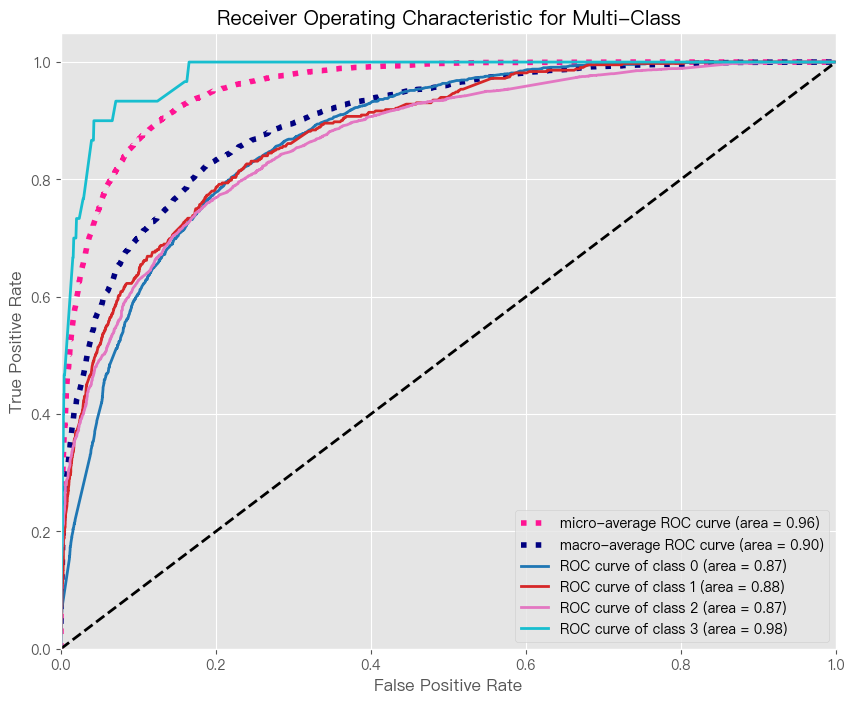

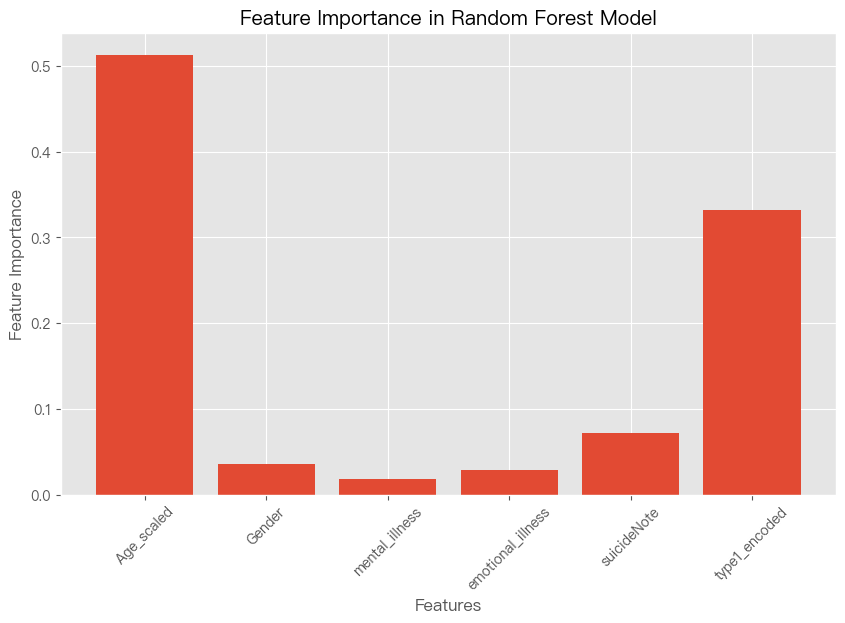

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# 1. 读取数据
df = pd.read_csv("../dataset/suicide.csv")

# 2. 清洗数据
# 转换年龄为数值型（中文"不詳"转为NaN）
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# 3. 特征编码
# 定义有序分类编码（假设风险等级：身亡=2 > 昏迷=1 > 清醒=0）
state_order = ['清醒', '不清醒', '身亡', '不詳']
ordinal_encoder = OrdinalEncoder(categories=[state_order])
df['State_merged'] = df['State'].replace({
    '迷糊': '不清醒',
    '紊亂': '不清醒',
    '昏迷': '不清醒',
    '清醒': '清醒',
    '身亡': '身亡',
    '不詳': '不詳'
})
df['State_encoded'] = ordinal_encoder.fit_transform(df[['State_merged']])

# 二值特征转换
binary_cols = ['suicideNote','mental_illness', 'emotional_illness']
df[binary_cols] = df[binary_cols].replace({'有': 1, '沒有': 0, '不詳': pd.NA})

# 性别编码
df['Gender'] = df['Gender'].map({'男': 1, '女': 0, '不詳': pd.NA})

# 对 type1 进行编码
type1_encoder = OrdinalEncoder()
df['type1_encoded'] = type1_encoder.fit_transform(df[['type1']])

# 4. 处理缺失值
# todo dropna
# 分类型特征用众数填补
# cat_imputer = SimpleImputer(strategy='most_frequent')
# df[['reason1', 'type1']] = cat_imputer.fit_transform(df[['reason1', 'type1']])

# # 连续型特征用中位数填补
# num_imputer = SimpleImputer(strategy='median')
# df['Age'] = num_imputer.fit_transform(df[['Age']])

# 5. 特征标准化
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])

# 6. 构建特征矩阵
features = df[['Age_scaled', 'Gender','mental_illness', 'emotional_illness','suicideNote', 'type1_encoded']]
labels = df['State_encoded']

# 二值化标签
labels_bin = label_binarize(labels, classes=np.unique(labels))
n_classes = labels_bin.shape[1]

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [50, 100, 150],
   'max_depth': [None, 5, 10],
   'min_samples_split': [2, 5, 10]
}

# 创建随机森林模型
model = RandomForestClassifier(random_state=42)

# 使用 GridSearchCV 进行网格搜索
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(features, labels)

# 获取最佳参数和最佳模型
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# 交叉验证
scores = cross_val_score(best_model, features, labels, cv=5, scoring='f1_weighted')
print(f"Random Forest F1 Score: {scores.mean():.2f} (±{scores.std():.2f})")

# 预测标签
predicted_labels = cross_val_predict(best_model, features, labels, cv=5)

# 计算混淆矩阵
conf_matrix = confusion_matrix(labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# 计算准确率
accuracy = accuracy_score(labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# 计算精确率
precision = precision_score(labels, predicted_labels, average='weighted')
print(f"Precision: {precision:.2f}")

# 计算召回率
recall = recall_score(labels, predicted_labels, average='weighted')
print(f"Recall: {recall:.2f}")

# 预测概率
y_score = best_model.predict_proba(features)

# 计算每个类别的 ROC 曲线和 AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(labels_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 计算微平均 ROC 曲线和 AUC
fpr["micro"], tpr["micro"], _ = roc_curve(labels_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# 计算宏平均 ROC 曲线和 AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# 绘制所有类别的 ROC 曲线
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = plt.cm.get_cmap('tab10', n_classes)
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")

# 特征重要性可视化
feature_names = features.columns
feature_importances = best_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=45)
plt.show()

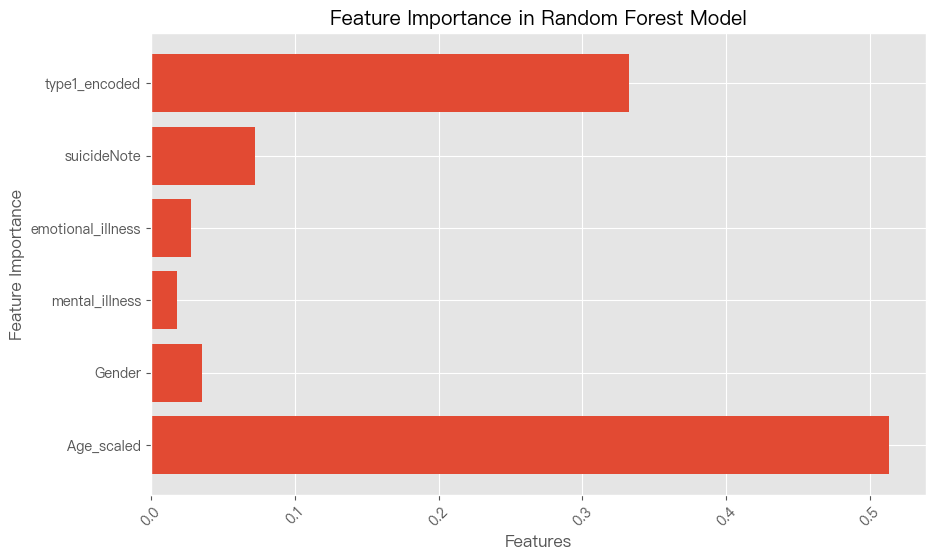

In [77]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=45)
plt.show()

/var/folders/r7/491xl4d10vxf4jjyv_41fryw0000gn/T/ipykernel_19459/3794869894.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'有': 1, '沒有': 0, '不詳': pd.NA})


Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
KNeighborsClassifier F1 Score: 0.75 (±0.01)
Confusion Matrix:
[[ 583   36  620    1]
 [ 103   57  272    0]
 [ 385   25 4424    0]
 [  17    1   12    0]]
Accuracy: 0.77
Precision: 0.75
Recall: 0.77


/var/folders/r7/491xl4d10vxf4jjyv_41fryw0000gn/T/ipykernel_19459/3794869894.py:152: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


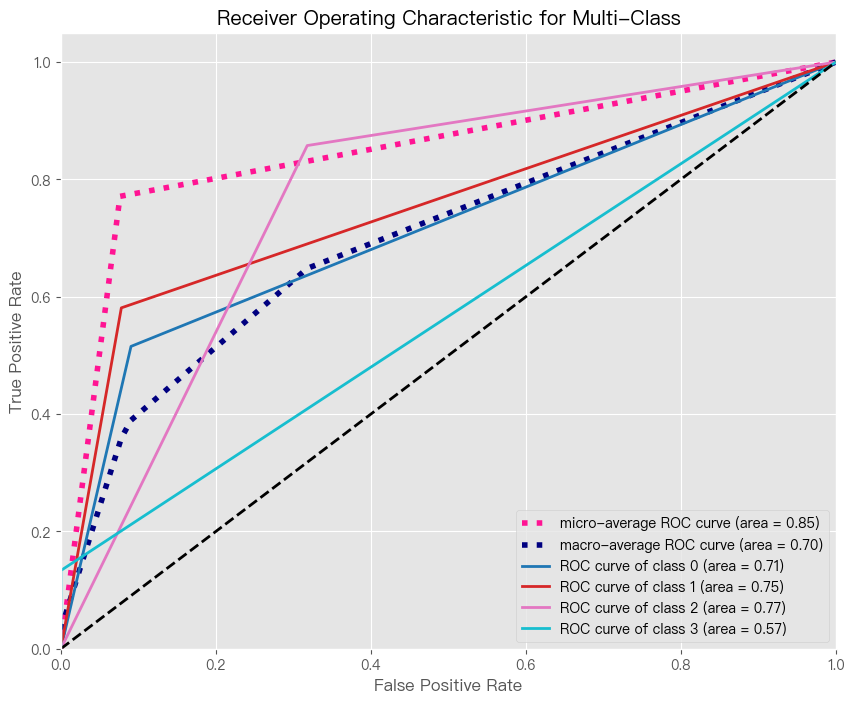

In [41]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier  # 导入 K 近邻分类器
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# 1. 读取数据
df = pd.read_csv("../dataset/suicide.csv")

# 2. 清洗数据
# 转换年龄为数值型（中文"不詳"转为NaN）
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# 3. 特征编码
# 定义有序分类编码（假设风险等级：身亡=2 > 昏迷=1 > 清醒=0）
state_order = ['清醒', '不清醒', '身亡', '不詳']
ordinal_encoder = OrdinalEncoder(categories=[state_order])
df['State_merged'] = df['State'].replace({
    '迷糊': '不清醒',
    '紊亂': '不清醒',
    '昏迷': '不清醒',
    '清醒': '清醒',
    '身亡': '身亡',
    '不詳': '不詳'
})
df['State_encoded'] = ordinal_encoder.fit_transform(df[['State_merged']])

# 二值特征转换
binary_cols = ['suicideNote', 'mental_illness', 'emotional_illness']
df[binary_cols] = df[binary_cols].replace({'有': 1, '沒有': 0, '不詳': pd.NA})

# 性别编码
df['Gender'] = df['Gender'].map({'男': 1, '女': 0, '不詳': pd.NA})

# 对 type1 进行编码
type1_encoder = OrdinalEncoder()
df['type1_encoded'] = type1_encoder.fit_transform(df[['type1']])

# 4. 处理缺失值
# 分类型特征用众数填补
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['reason1', 'type1']] = cat_imputer.fit_transform(df[['reason1', 'type1']])

# 连续型特征用中位数填补
num_imputer = SimpleImputer(strategy='median')
df['Age'] = num_imputer.fit_transform(df[['Age']])

# 5. 特征标准化
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])

# 6. 构建特征矩阵
features = df[['Age_scaled', 'Gender', 'mental_illness', 'emotional_illness', 'suicideNote', 'type1_encoded']]
labels = df['State_encoded']

# 二值化标签
labels_bin = label_binarize(labels, classes=np.unique(labels))
n_classes = labels_bin.shape[1]

# 定义要搜索的参数网格（针对 K 近邻模型）
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # 邻居数量
    'weights': ['uniform', 'distance'],  # 权重方式
    'p': [1, 2]  # 距离度量方式，1 为曼哈顿距离，2 为欧氏距离
}

# 创建 K 近邻模型
model = KNeighborsClassifier()

# 使用 GridSearchCV 进行网格搜索
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(features, labels)

# 获取最佳参数和最佳模型
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# 交叉验证
scores = cross_val_score(best_model, features, labels, cv=5, scoring='f1_weighted')
print(f"KNeighborsClassifier F1 Score: {scores.mean():.2f} (±{scores.std():.2f})")

# 预测标签
predicted_labels = cross_val_predict(best_model, features, labels, cv=5)

# 计算混淆矩阵
conf_matrix = confusion_matrix(labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# 计算准确率
accuracy = accuracy_score(labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# 计算精确率
precision = precision_score(labels, predicted_labels, average='weighted')
print(f"Precision: {precision:.2f}")

# 计算召回率
recall = recall_score(labels, predicted_labels, average='weighted')
print(f"Recall: {recall:.2f}")

# 预测概率（K 近邻模型需要特殊处理来获取类似概率的输出，这里简单示例）
from sklearn.neighbors import KDTree
tree = KDTree(features)
distances, indices = tree.query(features, k=1)
y_score = np.zeros((len(features), n_classes))
for i, idx in enumerate(indices):
    # 使用 labels_bin 来获取正确的索引
    label_index = np.where(labels_bin[idx[0]] == 1)[0][0]
    y_score[i, label_index] = 1

# 计算每个类别的 ROC 曲线和 AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(labels_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 计算微平均 ROC 曲线和 AUC
fpr["micro"], tpr["micro"], _ = roc_curve(labels_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# 计算宏平均 ROC 曲线和 AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# 绘制所有类别的 ROC 曲线
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = plt.cm.get_cmap('tab10', n_classes)
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()